In [449]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [450]:
df = pd.read_excel("Data_Train.xlsx")
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [451]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As only two values are missing drop those values

In [452]:
df = df.dropna()
df = df.reset_index()
df = df.drop(columns="index")
df.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10681,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


Chect the datatype of all columns

In [453]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We need to change the datatype of "Date_of_Journey", "Dep_Time","Arrival_Time" to datetime

In [454]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])

In [455]:
df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month

Convert Stop Column to integer

In [456]:
df.Total_Stops.unique()
df["Total_Stops"] = df["Total_Stops"].map({"non-stop": 0,"1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

Change datatype of column "Duration" to float or int

In [457]:
def duration_fun(time):
    time = time.split()
    count = 0
    for i in time:
        if i[-1]=="h":
            count += int(i[:-1])*60
        elif i[-1]=="m":
            count += int(i[:-1])
    return count
df["Duration"] = df["Duration"].apply(duration_fun)

In [458]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-10-22 22:20:00,2021-03-22 01:10:00,170,0,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-22 05:50:00,2021-10-22 13:15:00,445,2,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-22 09:25:00,2021-06-10 04:25:00,1140,2,No info,13882,6,9


# Data Exploration Column-wise

Variation of flight price with respected to Airline

C:\Users\kalpa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price')

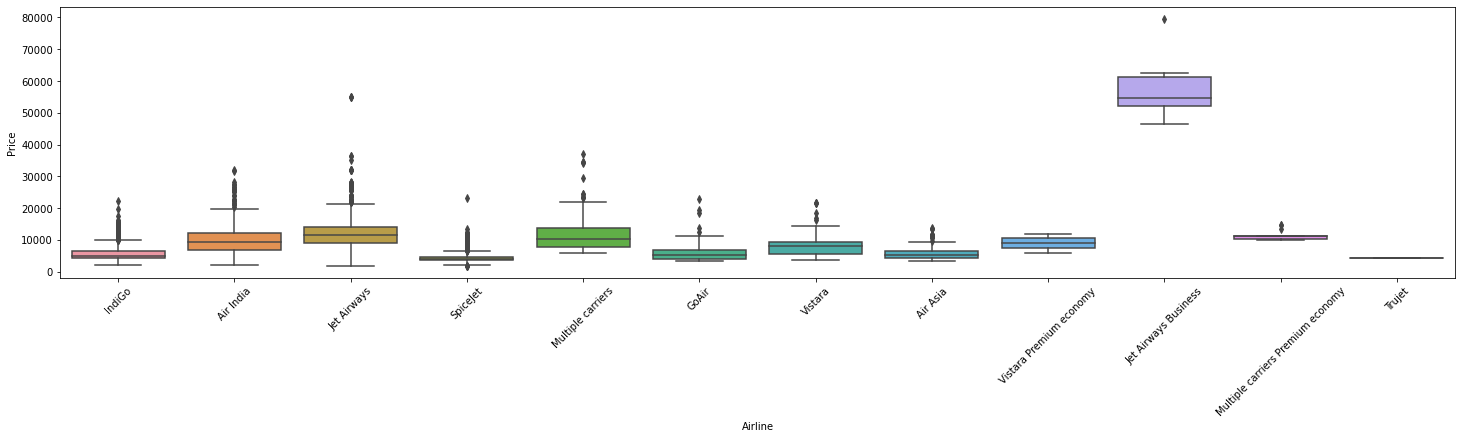

In [459]:
# Plot Box-plot for Price vs Airline
plt.figure(figsize=(25,5))
sns.boxplot(df["Airline"],df["Price"])
plt.xticks(rotation=45)
plt.xlabel("Airline")
plt.ylabel("Price")
# We can clearly see there is significant variation in Price wrt to Airline. Let's use one hot encoding for "Airline" column

C:\Users\kalpa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price')

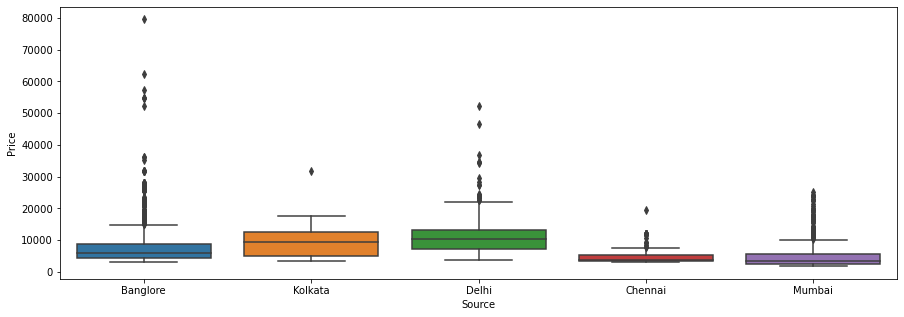

In [460]:
# Plot Box-plot for Price vs Airline
plt.figure(figsize=(15,5))
sns.boxplot(df["Source"],df["Price"])
plt.xlabel("Source")
plt.ylabel("Price")
# We can clearly see there is significant variation in Price wrt to Source. Let's use one hot encoding for "Source" column

C:\Users\kalpa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price')

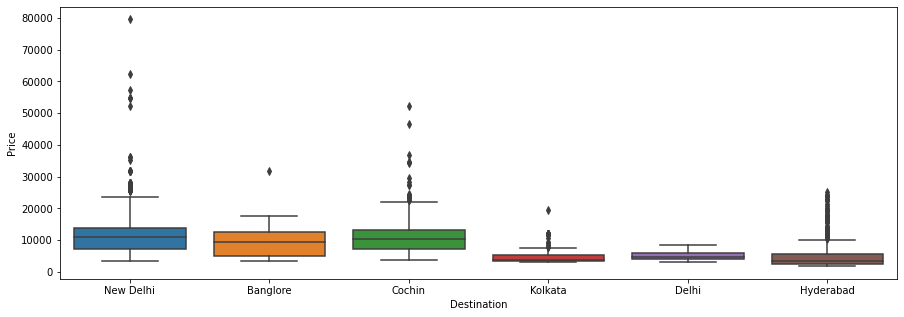

In [461]:
# Plot Box-plot for Price vs Airline
plt.figure(figsize=(15,5))
sns.boxplot(df["Destination"],df["Price"])
plt.xlabel("Destination")
plt.ylabel("Price")
# We can clearly see there is significant variation in Price wrt to Destination. Let's use one hot encoding for "Destination" column

Analysing Route columns is tricky part, Let's first see unique cities in all the routes including source and destination

In [462]:
def cities(series):
    lst = []
    for i in series:
        i = i.split("→")
        for j in i:
            j=j.strip()
            if j not in lst:
                lst.append(j)
    return lst
cities = cities(df.Route)
cities

['BLR',
 'DEL',
 'CCU',
 'IXR',
 'BBI',
 'LKO',
 'BOM',
 'COK',
 'NAG',
 'MAA',
 'AMD',
 'PNQ',
 'IDR',
 'GAU',
 'HYD',
 'BHO',
 'JAI',
 'ATQ',
 'JDH',
 'GOI',
 'BDQ',
 'TRV',
 'IXU',
 'IXB',
 'UDR',
 'RPR',
 'DED',
 'VGA',
 'VNS',
 'ISK',
 'IXC',
 'PAT',
 'JLR',
 'KNU',
 'GWL',
 'VTZ',
 'NDC',
 'HBX',
 'IXZ',
 'IMF',
 'IXA',
 'STV']

Create dataframe with columns cities and number of row equal to number of rows in training dataset and value of each entry to be zero

In [463]:
df_route = pd.DataFrame(columns=cities)
x=[0 for i in range(10682)]
df_route = df_route.append(x).drop(columns=0)
df_route.fillna(0,inplace=True)
df_route.head()

,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,...,NDC,PAT,PNQ,RPR,STV,TRV,UDR,VGA,VNS,VTZ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Update the city value to 1 if city is present in route

In [464]:
def route_list(string):
    lst = []
    string = string.split("→")
    for i in string:
        lst.append(i.strip())
    return lst

In [465]:
route_double_list = df.Route.apply(route_list)
route_double_list

0                  [BLR, DEL]
1        [CCU, IXR, BBI, BLR]
2        [DEL, LKO, BOM, COK]
3             [CCU, NAG, BLR]
4             [BLR, NAG, DEL]
                 ...         
10677              [CCU, BLR]
10678              [CCU, BLR]
10679              [BLR, DEL]
10680              [BLR, DEL]
10681    [DEL, GOI, BOM, COK]
Name: Route, Length: 10682, dtype: object

In [466]:
for i in range(10682):
    for j in df_route.columns:
        if j in route_double_list[i]:
            df_route.loc[i,j]=1
df_route.head()

,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,...,NDC,PAT,PNQ,RPR,STV,TRV,UDR,VGA,VNS,VTZ
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For Additional Info column

In [467]:
df["Additional_Info"].unique() #use one hot encoding

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

Let's try to understand variation in prices wrt departure time

C:\Users\kalpa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price')

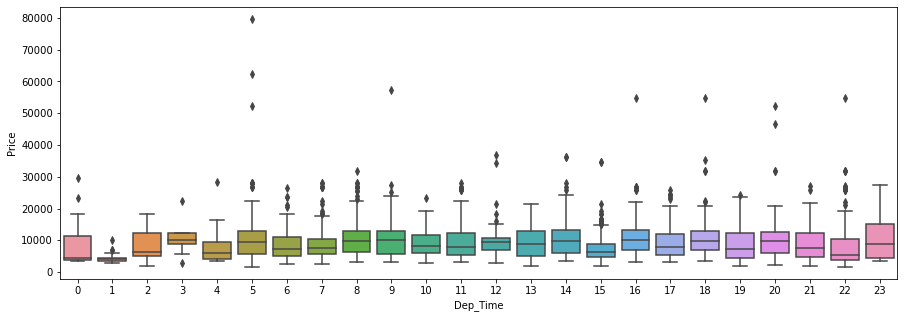

In [468]:
# Plot Box-plot for Price vs Dep_Time
plt.figure(figsize=(15,5))
sns.boxplot(df["Dep_Time"].dt.hour,df["Price"])
plt.xlabel("Dep_Time")
plt.ylabel("Price")

In [469]:
# Create a column called Dep_Hour where we consider only hour of departure(round off)
df["Dep_Hour"] = df["Dep_Time"].round("60min").dt.hour

Let's try to understand variation in prices wrt arrival time

C:\Users\kalpa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price')

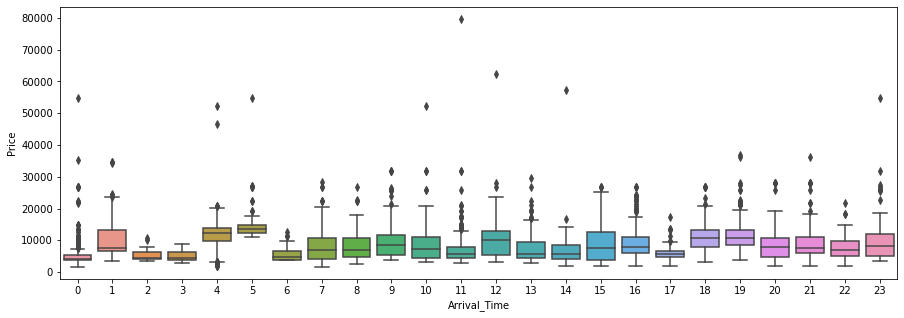

In [470]:
# Plot Box-plot for Price vs Arrival Time
plt.figure(figsize=(15,5))
sns.boxplot(df["Arrival_Time"].dt.hour,df["Price"])
plt.xlabel("Arrival_Time")
plt.ylabel("Price")

In [471]:
# Create a column called Dep_Hour where we consider only hour of departure(round off)
df["Arrival_Hour"] = df["Arrival_Time"].round("60min").dt.hour

In [472]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Arrival_Hour
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-10-22 22:20:00,2021-03-22 01:10:00,170,0,No info,3897,24,3,22,1
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-22 05:50:00,2021-10-22 13:15:00,445,2,No info,7662,5,1,6,13
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-22 09:25:00,2021-06-10 04:25:00,1140,2,No info,13882,6,9,9,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-10-22 18:05:00,2021-10-22 23:30:00,325,1,No info,6218,5,12,18,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-10-22 16:50:00,2021-10-22 21:35:00,285,1,No info,13302,3,1,17,22


In Route column Source and Destination is included so no need to consider this again

In [473]:
final = df.drop(columns=["Airline", "Date_of_Journey", "Source", "Destination", "Route", "Dep_Time", "Arrival_Time","Additional_Info"])
final.head()

,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Arrival_Hour
0,170,0,3897,24,3,22,1
1,445,2,7662,5,1,6,13
2,1140,2,13882,6,9,9,4
3,325,1,6218,5,12,18,0
4,285,1,13302,3,1,17,22


In [474]:
final.dtypes

Duration        int64
Total_Stops     int64
Price           int64
Day             int64
Month           int64
Dep_Hour        int64
Arrival_Hour    int64
dtype: object

Create one hot encoding for column Airline and additional_Info and concat the dataframe with "final" dataframe along with route dataframe

In [475]:
Airline=pd.get_dummies(df['Airline'], drop_first=True)
Additional_Info=pd.get_dummies(df['Additional_Info'], drop_first=True)

In [476]:
ultimate = pd.concat([final,Additional_Info,Airline,df_route], axis=1)
ultimate.head()

,Duration,Total_Stops,Price,Day,Month,Dep_Hour,Arrival_Hour,1 Short layover,2 Long layover,Business class,...,NDC,PAT,PNQ,RPR,STV,TRV,UDR,VGA,VNS,VTZ
0,170,0,3897,24,3,22,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,445,2,7662,5,1,6,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1140,2,13882,6,9,9,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,325,1,6218,5,12,18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,285,1,13302,3,1,17,22,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training The Model

In [477]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [478]:
x = ultimate.drop(columns=["Price"])
y = ultimate["Price"]

In [479]:
lin = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
lin.fit(x_train,y_train)
lin.score(x_test,y_test)

0.6951877392719732

In [480]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
ran = RandomForestRegressor()
ran.fit(x_train,y_train)
ran.score(x_test,y_test)

0.8750268597546216

We can you gridsearchCV or RandomSearchCV for find best suited algorithm for given problem.

# Testing the model

In [481]:
df = pd.read_excel("Test_set.xlsx")
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [482]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [483]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])
df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month

In [484]:
df["Total_Stops"] = df["Total_Stops"].map({"non-stop": 0,"1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})
df["Duration"] = df["Duration"].apply(duration_fun)

In [485]:
df_route = pd.DataFrame(columns=cities)
row=[0 for i in range(2671)]
df_route = df_route.append(row).drop(columns=0)
df_route.fillna(0,inplace=True)
df_route.head()

,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,...,NDC,PAT,PNQ,RPR,STV,TRV,UDR,VGA,VNS,VTZ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [486]:
route_double_list = df.Route.apply(route_list)
route_double_list

0       [DEL, BOM, COK]
1       [CCU, MAA, BLR]
2       [DEL, BOM, COK]
3       [DEL, BOM, COK]
4            [BLR, DEL]
             ...       
2666    [CCU, DEL, BLR]
2667         [CCU, BLR]
2668    [DEL, BOM, COK]
2669    [DEL, BOM, COK]
2670    [DEL, BOM, COK]
Name: Route, Length: 2671, dtype: object

In [487]:
for i in range(2671):
    for j in df_route.columns:
        if j in route_double_list[i]:
            df_route.loc[i,j]=1
df_route.head()

,AMD,ATQ,BBI,BDQ,BHO,BLR,BOM,CCU,COK,DED,...,NDC,PAT,PNQ,RPR,STV,TRV,UDR,VGA,VNS,VTZ
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [488]:
# Missing Columns
missing_col = ["1 Short layover", "2 Long layover","No Info", "Red-eye flight", "Trujet"]
df_missing = pd.DataFrame(columns=missing_col)
df_missing = df_missing.append(row).drop(columns=0)
df_missing.fillna(0,inplace=True)
df_missing.head()

,1 Short layover,2 Long layover,No Info,Red-eye flight,Trujet
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [489]:
df["Dep_Hour"] = df["Dep_Time"].round("60min").dt.hour
df["Arrival_Hour"] = df["Arrival_Time"].round("60min").dt.hour

In [490]:
final = df.drop(columns=["Airline", "Date_of_Journey", "Source", "Destination", "Route", "Dep_Time", "Arrival_Time","Additional_Info"])

In [491]:
Airline=pd.get_dummies(df['Airline'], drop_first=True)
Additional_Info=pd.get_dummies(df['Additional_Info'], drop_first=True)

In [492]:
ultimate = pd.concat([final,Additional_Info,Airline,df_route,df_missing], axis=1)
ultimate.head()

,Duration,Total_Stops,Day,Month,Dep_Hour,Arrival_Hour,Business class,Change airports,In-flight meal not included,No check-in baggage included,...,TRV,UDR,VGA,VNS,VTZ,1 Short layover,2 Long layover,No Info,Red-eye flight,Trujet
0,655,1,6,6,18,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,240,1,5,12,6,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1425,1,21,5,19,19,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,780,1,21,5,8,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,170,0,24,6,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [493]:
ultimate.shape

(2671, 68)

In [494]:
ran.predict(ultimate)

array([ 9033.69,  5113.43, 11214.35, ...,  9152.01, 10400.82,  6116.45])